In [ ]:
# CNN

In [8]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator ## NN 
import numpy as np
import matplotlib.pyplot as plt

In [1]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 38.63 MiB/s, done.
Checking out files: 100% (2295/2295), done.


# set the path to the main dir 
## Please change direction 

In [3]:
#set the path to the main dir
import os 
main_dir = "./datasets/Data"
#set the path to the train dir
train_dir = os.path.join(main_dir, "train")
#set the path to the test dir
test_dir = os.path.join(main_dir, "test")
#directory with the training covid images
train_covid_dir = os.path.join(train_dir, "COVID19")
#directory with the training normal images
train_normal_dir = os.path.join(train_dir, "NORMAL")
#directory with the testing covid images
test_covid_dir = os.path.join(test_dir, "COVID19")
#directory with the testing normal images
test_normal_dir = os.path.join(test_dir, "NORMAL")

# Two datasets

In [5]:
#print the filenames
train_covid_name  = os.listdir(train_covid_dir)
print(train_covid_name[:10])

train_normal_name  = os.listdir(train_normal_dir)
print(train_normal_name[:10])

test_covid_name  = os.listdir(test_covid_dir)
print(test_covid_name[:10])

test_normal_name  = os.listdir(test_normal_dir)
print(test_normal_name[:10])

['COVID19(20).jpg', 'COVID19(307).jpg', 'COVID19(461).jpg', 'COVID19(48).jpg', 'COVID19(204).jpg', 'COVID19(311).jpg', 'COVID19(201).jpg', 'COVID19(69).jpg', 'COVID19(299).jpg', 'COVID19(566).jpg']
['NORMAL(1243).jpg', 'NORMAL(1493).jpg', 'NORMAL(1410).jpg', 'NORMAL(1450).jpg', 'NORMAL(655).jpg', 'NORMAL(1582).jpg', 'NORMAL(663).jpg', 'NORMAL(1007).jpg', 'NORMAL(210).jpg', 'NORMAL(1121).jpg']
['COVID19(490).jpg', 'COVID19(294).jpg', 'COVID19(200).jpg', 'COVID19(568).jpg', 'COVID-19 (822).jpg', 'COVID-19 (353).jpg', 'COVID19(160).jpg', 'COVID19(98).jpg', 'COVID19(464).jpg', 'COVID19(278).jpg']
['NORMAL(593).jpg', 'NORMAL(1508).jpg', 'NORMAL(1207).jpg', 'NORMAL(1440).jpg', 'NORMAL(98).jpg', 'NORMAL(970).jpg', 'NORMAL(236).jpg', 'NORMAL(947).jpg', 'NORMAL(1367).jpg', 'NORMAL(415).jpg']


In [6]:
#print the total no of images present in each dir
print("Total Images Present in The training Set: ", len(train_covid_name+train_normal_name))
print("Total Images Present in The testing Set: ", len(test_covid_name+test_normal_name))

Total Images Present in The training Set:  1811
Total Images Present in The testing Set:  484


# Data Visualization

['./datasets/Data/train/COVID19/COVID19(20).jpg', './datasets/Data/train/COVID19/COVID19(307).jpg', './datasets/Data/train/COVID19/COVID19(461).jpg', './datasets/Data/train/COVID19/COVID19(48).jpg', './datasets/Data/train/COVID19/COVID19(204).jpg', './datasets/Data/train/COVID19/COVID19(311).jpg', './datasets/Data/train/COVID19/COVID19(201).jpg', './datasets/Data/train/COVID19/COVID19(69).jpg']
['./datasets/Data/train/NORMAL/NORMAL(1243).jpg', './datasets/Data/train/NORMAL/NORMAL(1493).jpg', './datasets/Data/train/NORMAL/NORMAL(1410).jpg', './datasets/Data/train/NORMAL/NORMAL(1450).jpg', './datasets/Data/train/NORMAL/NORMAL(655).jpg', './datasets/Data/train/NORMAL/NORMAL(1582).jpg', './datasets/Data/train/NORMAL/NORMAL(663).jpg', './datasets/Data/train/NORMAL/NORMAL(1007).jpg']


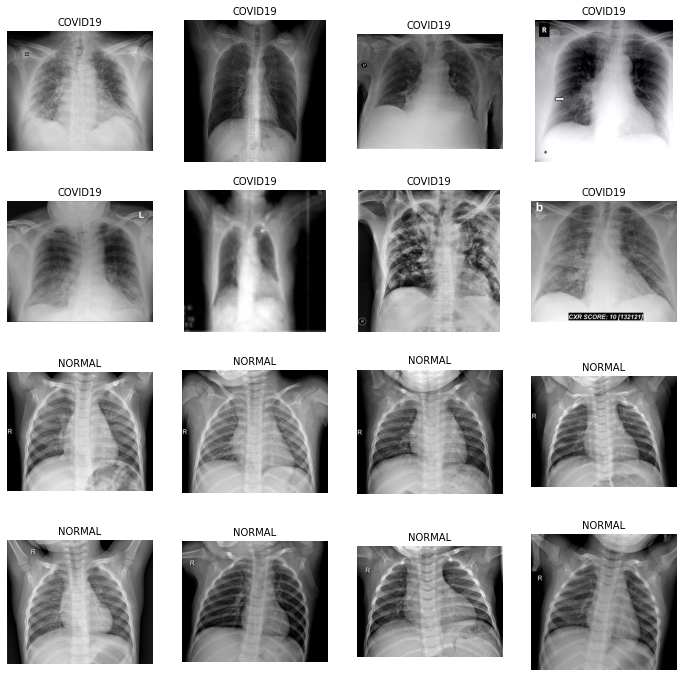

In [10]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg
#set the number of columns and rows
rows = 4
cols = 4

#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)
#get the filenames from the covid & normal dir of the train dataset
covid_pic = [os.path.join(train_covid_dir, filename)for filename in train_covid_name[0:8]]
normal_pic = [os.path.join(train_normal_dir, filename)for filename in train_normal_name[0:8]] ## find the name with its coressponding pic
#print the list
print(covid_pic)
print(normal_pic)
#merge the covid and normal list
merged_list = covid_pic + normal_pic
for i, img_path in enumerate(merged_list):
  data = img_path.split("/", 6)[4] # only want the last 6 digits of name
  sp = plt.subplot(rows, cols, i + 1)
  sp.axis("off")
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize = 10)
  plt.imshow(img, cmap = "gray")
plt.show()


# Data Preprocessing & Augmentation

In [12]:
# generate training,testing and validation batches
# generate training,testing and validation batches 
dgen_train =  ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True) # normalized by rescale, zoom = randome cross from the image, horizontal  
dgen_validation = ImageDataGenerator(rescale = 1./255)
dgen_test =  ImageDataGenerator(rescale = 1./255)

train_generator = dgen_train.flow_from_directory(train_dir,target_size = (150, 150),
                                                                            subset = "training",
                                                                            batch_size = 32,
                                                                            class_mode = "binary") #invoke flow # l image from the train directory, size here is the size we want the image tobe , batch == how mamy images will be sized in a once, class mode is k classees

validation_generator  =dgen_train.flow_from_directory(train_dir, target_size = (150,150),
                                                                            subset = "validation",
                                                                            batch_size = 32,
                                                                            class_mode = "binary" 
)

test_generator = dgen_train.flow_from_directory(test_dir, target_size = (150,150),

                                                                            batch_size = 32,
                                                                            class_mode = "binary")

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


# CNN Modeling

In [13]:
model = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32, (5,5), padding="SAME", activation="relu", input_shape = (150,150,3))) # the shape should be the same with above 
model.add(MaxPooling2D(pool_size=(2,2))) # reduce the szie to half to reduce the parameters
# place a dropout layer to avoide overfitting 

model.add(Dropout(0.5)) # drop out 50% neuros to 
# add another convolutional layer 
model.add(Conv2D(64, (5,5), padding="SAME", activation="relu"))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2))) 

# place a dropout layer
model.add(Dropout(0.5)) 

# Flatten layer covert the 2D image to 1D image 
model.add(Flatten())

# add a dense layer : amount of nodes, activation ## all neuros are connected to the next layer 16*16
model.add(Dense(256, activation="relu"))

# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update, output layer here only 1 layer 
model.add(Dropout(0.5))
model.add(Dense(1, activation= "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

### Analysis for the above
#### The first LayerL The output is from (150,150,3) to (150, 150, 32) BECAUSE: (32, (5,5)) with 32 filters 
#### max_pooling2d (2,2) for becoming two windows, then shape become (75,75,32) 

#### conv2d_1 (Conv2D)            (None, 75, 75, 64)  # second layer uses 64 filters

#### max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64) # become two windos, then half 

#### output layer with one output dense_1 (Dense)              (None, 1)


# Compile & Train the Model

In [16]:
#compile the model
model.compile(Adam(lr = 0.001), loss = "binary_crossentropy", metrics= ["accuracy"]) # training rate = 0.001, metrics == track of -- for each epoch 

In [ ]:
#train the model
# 30 epoches, 30 times to pass the whole data to network, more epoches, more time needed on training model
history = model.fit(train_generator,
                    epochs = 5,
                    validation_data = validation_generator) ## what is the difference between epos and batches: 10000 images, batch = 10 which means that 10 images one group to pass the network, and it takes 100 time to make all the data to pass the one single epos

Epoch 1/5
12/46 [======>.......................] - ETA: 1:05 - loss: 6.1008 - accuracy: 0.5621

# Performance Evaluation

In [ ]:
#get the keys of history object

# 30 epoches, 30 times to pass the whole data to network
history.history.keys()

In [ ]:
#plot graph between training and validation loss
plt.plot(history.history["loss"])
plt.plot(history.history['val_loss'])
plt.legend(["Training", "Validation"])
plt.title("Training and validation Lossess")
plt.xlabel("epoch") # loss going down, is good! 

In [ ]:
#plot graph between training and validation accuarcy
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.legend(["Training", "Validation"])
plt.title("Training and validation accuracy")
plt.xlabel("epoch") # accuracy is going up, great!

In [ ]:
# get the test acuarcy and loss
test_loss, test_acc = model.evaluate(test_generator)
print("test loss: {} test acc: {}".format(test_loss, test_acc))

# Prediction On New Data

In [ ]:
from google.colab import files # based on where your file is 
from keras.preprocessing import image
uploaded = files.upload()
for filename in uploaded.keys():
  img_path = "/content/" + filename
  imges = image.load_img(img_path, target_size = (150,150))
  images = np.expand_dims(images, axis = 0)
  predicition = model.predict(images)
  ## 1 for covide, 0 for non
  print(filename)

  if prediction == 0:
    print("covide detected")
  else:
    print("Your report is normal")

# Data Exploration

In [ ]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
sns.set()

In [ ]:
# Read csv file containing training datadata
train_df = pd.read_csv("nih/train-small.csv")
# Print first 5 rows
print(f'There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in this data frame')
train_df.head()